In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.06G/1.06G [00:07<00:00, 160MB/s]
100% 1.06G/1.06G [00:07<00:00, 155MB/s]


In [ ]:
import zipfile
zip_ref=zipfile.ZipFile("/content/dogs-vs-cats.zip","r")
zip_ref.extractall("/content")
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
train_ds=tf.keras.utils.image_dataset_from_directory(
    directory="/content/train",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256,256)
)
validation_ds=tf.keras.utils.image_dataset_from_directory(
    directory="/content/test",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
#normalize
def process(image,label):
  image=tf.cast(image/255,tf.float32)
  return image,label

train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)

In [ ]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding="valid",activation="relu",input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

model.add(Conv2D(64,kernel_size=(3,3),padding="valid",activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

model.add(Conv2D(128,kernel_size=(3,3),padding="valid",activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1,activation="sigmoid"))


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [ ]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [ ]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 69s 104ms/step - loss: 1.7194 - accuracy: 0.5728 - val_loss: 0.6182 - val_accuracy: 0.6662
Epoch 2/10
625/625 [==============================] - 67s 107ms/step - loss: 0.6231 - accuracy: 0.6704 - val_loss: 0.5414 - val_accuracy: 0.7382
Epoch 3/10
625/625 [==============================] - 64s 102ms/step - loss: 0.5433 - accuracy: 0.7327 - val_loss: 0.4845 - val_accuracy: 0.7734
Epoch 4/10
625/625 [==============================] - 65s 103ms/step - loss: 0.4813 - accuracy: 0.7773 - val_loss: 0.5371 - val_accuracy: 0.7278
Epoch 5/10
625/625 [==============================] - 67s 107ms/step - loss: 0.4233 - accuracy: 0.8087 - val_loss: 0.4108 - val_accuracy: 0.8160
Epoch 6/10
625/625 [==============================] - 68s 108ms/step - loss: 0.3815 - accuracy: 0.8332 - val_loss: 0.5407 - val_accuracy: 0.7354
Epoch 7/10
625/625 [==============================] - 67s 107ms/step - loss: 0.3238 - accuracy: 0.8608 - val_loss: 0.6971 - val_ac

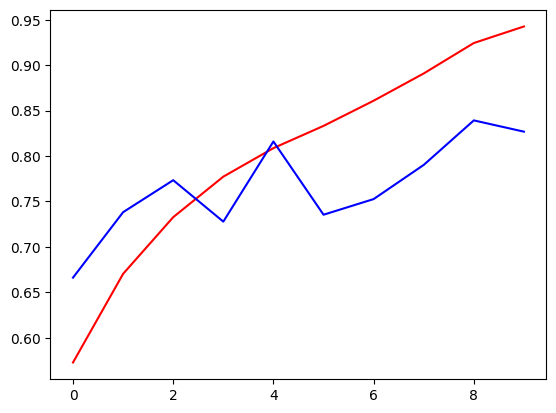

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color="red",label="train")
plt.plot(history.history['val_accuracy'],color="blue",label="validation")

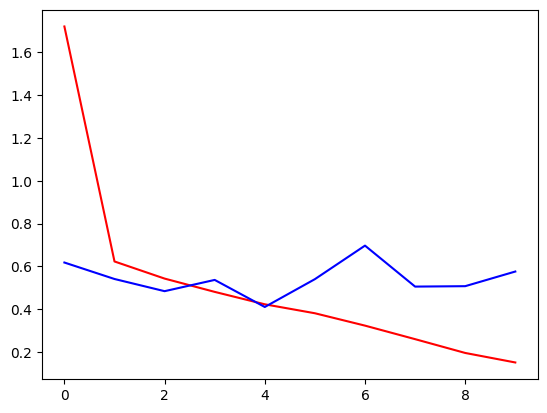

In [ ]:
plt.plot(history.history['loss'],color="red",label="train")
plt.plot(history.history['val_loss'],color="blue",label="validation")

In [ ]:
import cv2

In [ ]:
img_test=cv2.imread("/content/dog.jpeg")


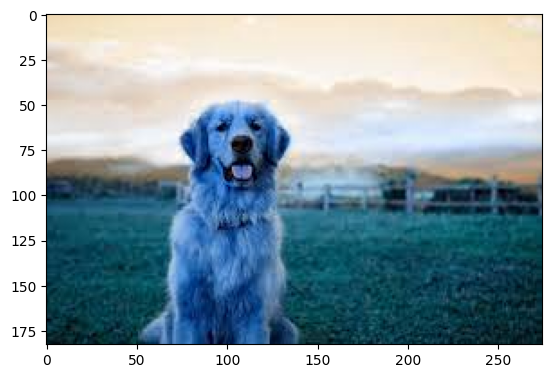

In [ ]:
plt.imshow(img_test)

In [ ]:
img_test.shape

(183, 275, 3)

In [ ]:
img_test=cv2.resize(img_test,(256,256))

In [ ]:
input=img_test.reshape((1,256,256,3))

In [ ]:
model.predict(input)

1/1 [==============================] - 0s 18ms/step


array([[1.]], dtype=float32)